   # Zomato Data Analysis Project

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the Data
zomato = pd.read_csv('Zomato data .csv')
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## Data Cleaning

In [3]:
# convert Rating column Data Type
def convert_rate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

zomato['rate'] = zomato['rate'].apply(convert_rate)

In [4]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of Restaurants

Text(0.5, 0, 'type of restaurant')

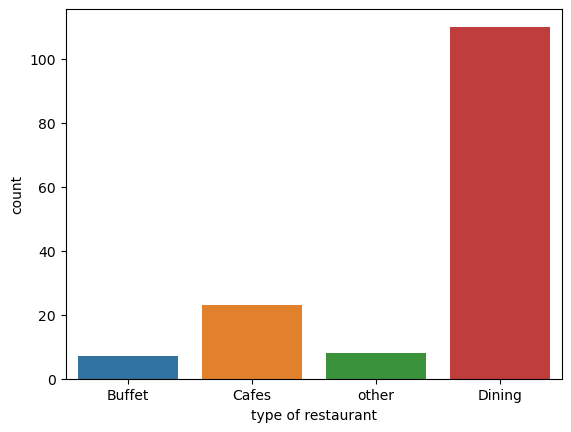

In [7]:
sns.countplot(x = zomato['listed_in(type)'])
plt.xlabel('type of restaurant')

**Observation**
- Mejority of restaurants are falls under Dining Category

## No of Votes Per Restaurant

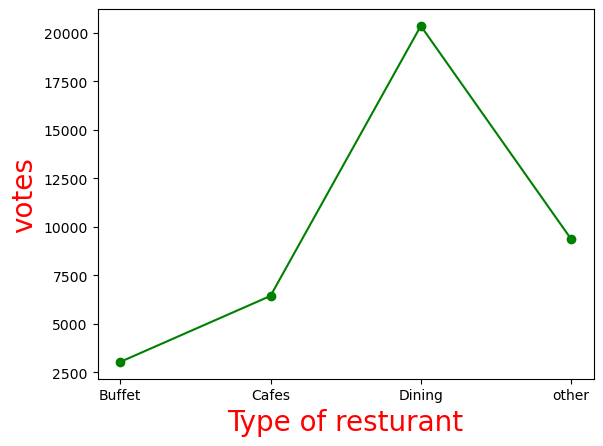

In [9]:
grouped_data = zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c = 'green', marker = 'o')
plt.xlabel('Type of resturant', c = 'red', size = 20)
plt.ylabel('votes', c = 'red', size = 20)
plt.show()

**Observation**
- Dining Resturants having more votes than others 

## Ratings Distribution

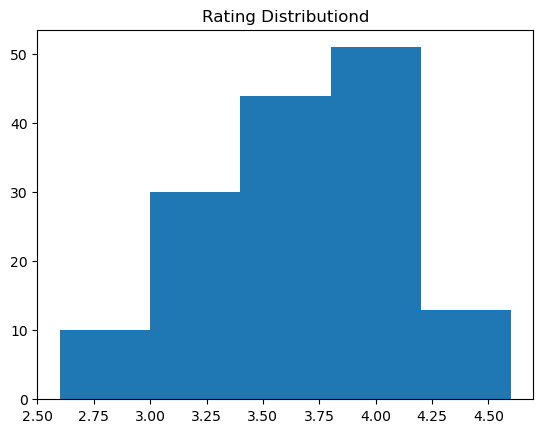

In [10]:
plt.hist(zomato['rate'], bins = 5)
plt.title('Rating Distributiond')
plt.show()

**Observation**
- The Mejority Resturants Recieved Ratings from 3.5 to 4

## Average Order Price

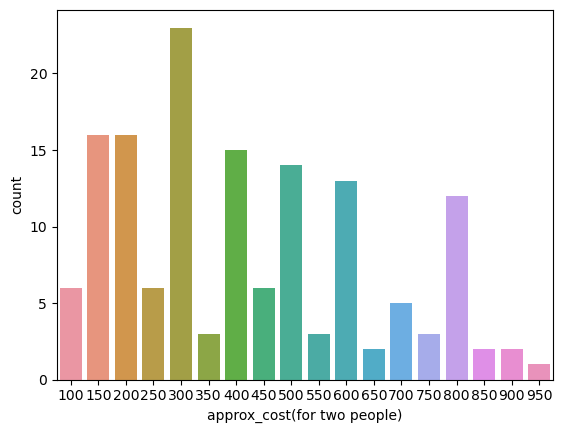

In [12]:
couple_data = zomato['approx_cost(for two people)']
sns.countplot(x = couple_data)
plt.show()

**Observation**
- The mejority of couples prefer approximate cost of 300

## Mode Wise Rating

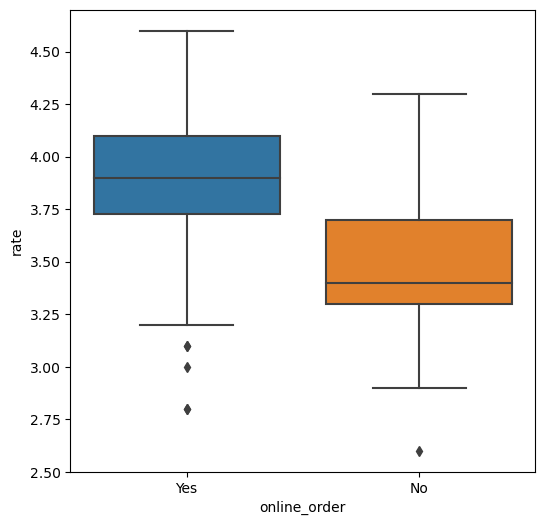

In [14]:
plt.figure(figsize = [6,6])
sns.boxplot(x = 'online_order', y = 'rate', data = zomato)
plt.show()

**Observation**
- Online order recieve better rating than ofline order

## Resturant wise order

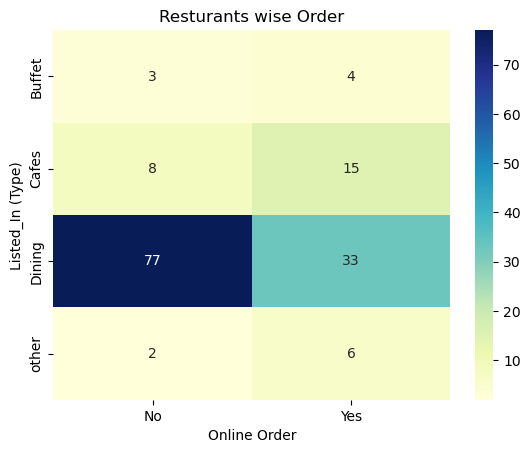

In [17]:
pivot_table = zomato.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title('Resturants wise Order')
plt.xlabel('Online Order')
plt.ylabel('Listed_In (Type)')
plt.show()

**Observation**
- Dining Resturants people prefer to offline order 
- Cafes generally prefer online order
- ***THIS SUGGESTS THAT CLIENTS PREFER ORDER IN PERSON AT RESTURANTS, BUT PREFER ONLINE ORDERING AR CAFES***